<a href="https://colab.research.google.com/github/akjieettt/data-science-final-project/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chemistry Behind Wine And Food Pairings

**Group Members**: Hrishi Kabra and Kiet Huynh

**Project Website**: https://akjieettt.github.io/data-science-final-project/

**Github Repository**: https://github.com/akjieettt/data-science-final-project

## Information & Motivation

## Project Overview

Our project will investigate the relationship between chemical composition and wine quality, focusing on identifying which physicochemical properties most strongly predict wine quality and how these relationships differ between red and white wines. Our project aims to provide insights into wine production that could benefit winemakers and consumers.

Our project will investigate the relationship between the chemical composition of wines and the different foods it pairs with. We will focus on identifying the physiochemical properties  that most strongly influence the foods it pairs with. Our project aims to provide insights into wine production that could benefit winemakers and consumers.

### Research Questions

**Primary Question**: *Can the chemical properties of a wine predict optimal food pairings, and do these predictions align with expert pairing assessments.*

**Secondary Questions**:
1. *How do specific chemical properties correlate with pairing quality scores across food categories.*
2. *Can we build a classification model to predict food categories from chemical profiles?*
3. *Do high-quality wines (≥7) demonstrate different pairing patterns than lower-quality wines?*

### Background

Wine and food pairing is an art form that relies on centuries of culinary wisdom and sommeleir expertise. There are some traditional pairing patterns that have held true, red wine with red meats, white wine with seafoods, sweeter wine with desserts. Are these pairings based on tradition or is there some chemistry behind them that makes it a better match.

Acidity, sugar, alcohol, and sulphur levels shape how a wine feels and tastes. For example, alcohol adds warmth and body, while acidity changes the freshness and balance of a wine.

By studying these chemical properties, we can better understand what makes good wine and food pairings instead of solely relying on human taste tests.

### Motivation For This Project

Wine production is an art and science where chemical composition determines quality. Understanding these relationships through data science can provide valuable insights for:
- **Consumers**: Choose wines for meals based on chemistry, not just color or region
- **Restaurants**: Optimize wine lists to complement menu offerings using data-driven principles
- **Winemakers**: Understand how production decisions affect both quality and food compatibility
- **Sommeliers**: Validate traditional pairing wisdom with quantitative evidence

### Collaboration Plan

**Team Coordination:**
- Set up a private GitHub repository to coordinate all code, share datasets, and track progress
- Each member works on separate branches to implement features, which are merged via pull requests after code review to ensure consistency

**Technologies Used:**
- Version Control: Git and GitHub for source code management and collaboration
- Development Environment: Visual Studio Code Live Share, Google Colab, and Jupyter Notebooks for data analysis and prototyping
- Communication Tools: Small Family Collaboration Hub for offline discussions, FaceTime for online discussions and Google Docs for shared notes

**Meeting Schedule:**
- Consistently meet offline 2 - 3 times per week for 1 - 3 hours per session to discuss progress, solve problems, and coordinate tasks
- Outside of scheduled meetings, we communicate asynchronously via iMessage to stay aligned and share updates

**Task Management:**
- Tasks are divided based on expertise and interest
- Progress is tracked via a shared progress table (in a spreadsheet) to ensure deadlines are met and responsibilities are clear

## Data Sources

Our first dataset is the [**Wine Quality**](https://archive.ics.uci.edu/dataset/186/wine+quality) dataset from UC Irvine's Machine Learning Repository. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine:

1. **winequality-red**: Data About Red Wines
   - **Source**: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)
   - **Coverage**: Data about 1,599 different Red Wines
   - **Output**: quality rating (0–10) assigned by tasters

2. **winequality-white**: Data About White Wines
   - **Source**: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)
   - **Coverage**: Data about 4,898 different White Wines
   - **Output**: quality rating (0–10) assigned by tasters

Our next dataset is a [**Wine and Food Pairing**](https://www.kaggle.com/datasets/wafaaelhusseini/wine-and-food-pairing-dataset/data) dataset from Kaggle. This contains Wine and Food pairings scored from 1 (Terrible) to 5 (Excellent) based on compatibility of wine style, food flavor profile, and more:

1. **wine_food_pairings**: Data about Wine and Food pairings
   - **Source**: [Kaggle](https://www.kaggle.com/datasets/wafaaelhusseini/wine-and-food-pairing-dataset/data)
   - **Coverage**: Data about 34,933 different White Wines
   - **Output**: Pairing quality from 1-5 (Terrible to Excellent)

### Integration Strategy

We wish to connect the two datasets by matching wine categories, red and white, and creating chemical profiles based on acidity, sweetness, and body levels. After this we could analyze how these chemical properties correlate with pairing success and test if quality score affects pairing versatility.

### Imports and Loading the Data

In [37]:
!git clone https://github.com/akjieettt/data-science-final-project.git
%cd data-science-final-project/

Cloning into 'data-science-final-project'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 165 (delta 34), reused 4 (delta 4), pack-reused 109 (from 1)
Receiving objects: 100% (165/165), 4.22 MiB | 11.07 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/data-science-final-project/data-science-final-project/data-science-final-project/data-science-final-project


#### Loading the Wine Quality Data

In [38]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the wine quality datasets
df_reds = pd.read_csv("data/winequality-red.csv", sep=";")
df_whites = pd.read_csv("data/winequality-white.csv", sep=";")

# Add wine type identifiers for red and white
df_reds['type'] = 'red'
df_whites['type'] = 'white'

# Combine the red and white wine datasets into a single df
df_wines = pd.concat([df_reds, df_whites], ignore_index=True)

# Printing the number of wines in each dataset
print(f"Total Number of Red Wines: {len(df_reds)}")
print(f"Total Number of White Wines: {len(df_whites)}")
print(f"Total Number of Wines: {len(df_wines)}")
print(f"Total Number of NaNs:")
display(df_wines.isna().sum())

print("\nThe Dataset:")
display(df_wines.head())

Total Number of Red Wines: 1599
Total Number of White Wines: 4898
Total Number of Wines: 6497
Total Number of NaNs:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0



The Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Wine Quality Dataset Overview

We can see above that the dataset has roughly 6500 different wines. It also has 13 different columns, shown below with its corresponding datatype:
1. **fixed acidity**: Ratio
2. **volatile acidity**: Ratio
3. **citric acid**: Ratio
4. **residual sugar**: Ratio
5. **chlorides**: Ratio
6. **free sulfur dioxide**: Ratio
7. **total sulfur dioxide**: Ratio
8. **density**: Ratio
9. **pH**: Interval (logarithmic scale)
10. **sulphates**: Ratio
11. **alcohol**: Ratio
12. **quality**: Ordinal
13. **type**: Nominal
14. **wine_id**: Nominal

Some More Information About The Dataset
- **Total Samples**: 6,497 wines
- **Red Wines**: 1,599 samples
- **White Wines**: 4,898 samples
- **NaNs**: Since there are no NaN's in this dataset, there is no need to modify it further for now.

#### Loading the Wine and Food Pairing Data

In [39]:
# Loading the wine and food pairing data
df_pairing = pd.read_csv("data/wine_food_pairings.csv")

print(f"Total Number of Wine and Food Pairings: {len(df_pairing)}\n")
print(f"Total Number of NaNs:")
display(df_pairing.isna().sum())

print("\nThe Dataset:")
display(df_pairing.head())

Total Number of Wine and Food Pairings: 34933

Total Number of NaNs:


,0
wine_type,0
wine_category,0
food_item,0
food_category,0
cuisine,0
pairing_quality,0
quality_label,0
description,0



The Dataset:


,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.


#### Wine and Food Pairing Dataset Overview

We can see above that the dataset has roughly 3,500 different wine and food pairings. It also has 8 different columns, shown below with its corresponding datatype:
1. **wine type**: Nominal
2. **wine category**: Nominal
3. **food item**: Nominal
4. **food category**: Nominal
5. **cuisine**: Nominal
6. **pairing quality**: Ordinal
7. **quality label**: Ordinal
8. **description**: Nominal


Some More Information About The Dataset
- **Total Wine and Food Pairings**: 34,933 wines
- **Wine Categories**: The different wine categories are Dessert, Fortified, Red, Rosé, Sparkling, and White
- **Food Categories**: Acidic, Cheese, Creamy, Dessert, Pork, Poultry, Red Meat, Salty Snack, Seafood, Smoky BBQ, Spicy, Vegetarian
- **NaNs**: Since there are no NaN's in this dataset, there is no need to modify it further for now.

## ETL and Integrating the data

Since our Wine Quality dataset only has information about Red and White wines, we are going to drop all the Wine and Food Pairings that are not Red or White wines. We are also going to change the `quality_label` to be only good, neutral, or bad.

In [40]:
# Drop the wine and food pairings that don't have a red or white wine
df_pairing = df_pairing[df_pairing['wine_category'].isin(['Red', 'White'])]
df_pairing.reset_index(drop=True, inplace=True)

display(df_pairing.groupby('wine_category').size())

# Make sure pairing_quality is numeric (int or float)
df_pairing['pairing_quality'] = pd.to_numeric(df_pairing['pairing_quality'])

quality_to_label = {
    1: 'bad',
    2: 'bad',
    3: 'neutral',
    4: 'good',
    5: 'good'
}

df_pairing['quality_label'] = df_pairing['pairing_quality'].map(quality_to_label)

display(df_pairing.head())

,0
wine_category,
Red,12908
White,11193


,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,bad,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,neutral,Heuristic pairing assessment.
2,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,good,Tannic red complements red meat fat.
3,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,bad,Heuristic pairing assessment.
4,Pinot Noir,Red,citrus salad,Acidic,Argentinian,4,good,Acidic wine balances acidic food.


From this we can see that we have:
- 12,908 Red Wine and Food Pairings
- 11,193 White Wine and Food Pairings

All other wines other than red and white have not been taken into consideration, and the values in quality label have changed from Terrible, Poor, Neutral, Good, Excellent to only bad, neutral, good. Now we are going to create our chemical categories to connect it to the chemical properties dataset.

We can examine the `description` column from df_pairing to examine the relationship between the chemical properties of wine and the key characteristics of food

The `description` column provides brief explanations that justify why certain wine–food combinations succeed or fail. These descriptions capture common pairing heuristics (such as acidity balance, tannin–fat interactions, and flavor intensity matching) and also include a few deliberately bad examples for contrast.

The table acts as a reference for understanding the logic behind pairing ratings.

In [41]:
# The different descriptions
df_pairing.groupby('description').size()

,0
description,
Acidic wine balances acidic food.,1850
Acidic wine balances acidic food.; Dry table wine clashes with dessert sweetness.,153
Crisp acidity suits seafood.,587
Deliberately bad pairing example for contrast.,3845
Delicate wine overwhelmed by red meat.,1254
Dry table wine clashes with dessert sweetness.,441
Heavy wine can dominate poultry.,97
Heuristic pairing assessment.,9035
High tannin intensifies spice heat.,48


### Extracting Chemical Profiles from Expert Descriptions

Our pairing dataset includes a limited set of standardized descriptions. Each one highlights a specific chemical charectiristic relevant to food pairing. By analyzing these descriptions, we can infer the wine's chemical profile.

- **"Acidic wine balances acidic food"** - High acidity wines
- **"Crisp acidity suits seafood"** - High acidity, lighter body
- **"Tannic red complements red meat fat"** - High tannins (sulphates)
- **"Richer body matches creamy textures"** - Full-bodied wines
- **"Off-dry sweetness calms spice"** - Wines with residual sugar
- **"Delicate wine overwhelmed by red meat"** - Light body, low tannins

We are creating four inference functions to extract a certain chemical property from each description. When descriptions don't explicitly mention something, we default to a middle value to avoid extreme assumptions.

In [42]:
# Function to infer the acidity of the wine
def infer_acidity(description):
    d = description.lower()
    if "low-acid" in d:
        return "Low"
    if "acidic" in d or "crisp acidity" in d:
        return "High"
    return "Medium"

# Function to infer the sweetness of the wine
def infer_sweetness(description):
    d = description.lower()
    if "off-dry" in d:
        return "Off-Dry"
    if "dry" in d:
        return "Dry"
    return "Off-Dry"

# Function to infer the body of the wine
def infer_body(description):
    d = description.lower()
    if "light" in d or "delicate" in d or "lean" in d:
        return "Light"
    if "heavy" in d or "rich" in d or "full" in d:
        return "Full"
    return "Medium"

# Function to infer the Tannin Proxy of the wine
def infer_tannin(description):
    d = description.lower()
    if "tannic" in d or "high tannin" in d:
        return "High"
    if "delicate wine overwhelmed" in d:
        return "Low"
    return "Medium"

# Applying these functions to get values for acidity, sweetness, body, and tannin proxy for the wines
df_pairing["acidity_level"] = df_pairing["description"].apply(infer_acidity)
df_pairing["sweetness_level"] = df_pairing["description"].apply(infer_sweetness)
df_pairing["body_level"] = df_pairing["description"].apply(infer_body)
df_pairing["tannin_proxy"] = df_pairing["description"].apply(infer_tannin)

df_pairing.head()

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description,acidity_level,sweetness_level,body_level,tannin_proxy
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,bad,Heuristic pairing assessment.,Medium,Off-Dry,Medium,Medium
1,Grenache,Red,charcuterie board,Salty Snack,French,3,neutral,Heuristic pairing assessment.,Medium,Off-Dry,Medium,Medium
2,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,good,Tannic red complements red meat fat.,Medium,Off-Dry,Medium,High
3,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,bad,Heuristic pairing assessment.,Medium,Off-Dry,Medium,Medium
4,Pinot Noir,Red,citrus salad,Acidic,Argentinian,4,good,Acidic wine balances acidic food.,High,Off-Dry,Medium,Medium


These inferred categories allow us to match the pairing dataset with our chemical dataset.

### Creating Matching Chemical Categories in the Wine Quality Dataset

We need to create equivalent categories in the chemical properties dataset. This requires examining the actual chemical properties and determining appropriate thresholds.

We are first visualizing how the key chemical properties are distributed across red and white wines.

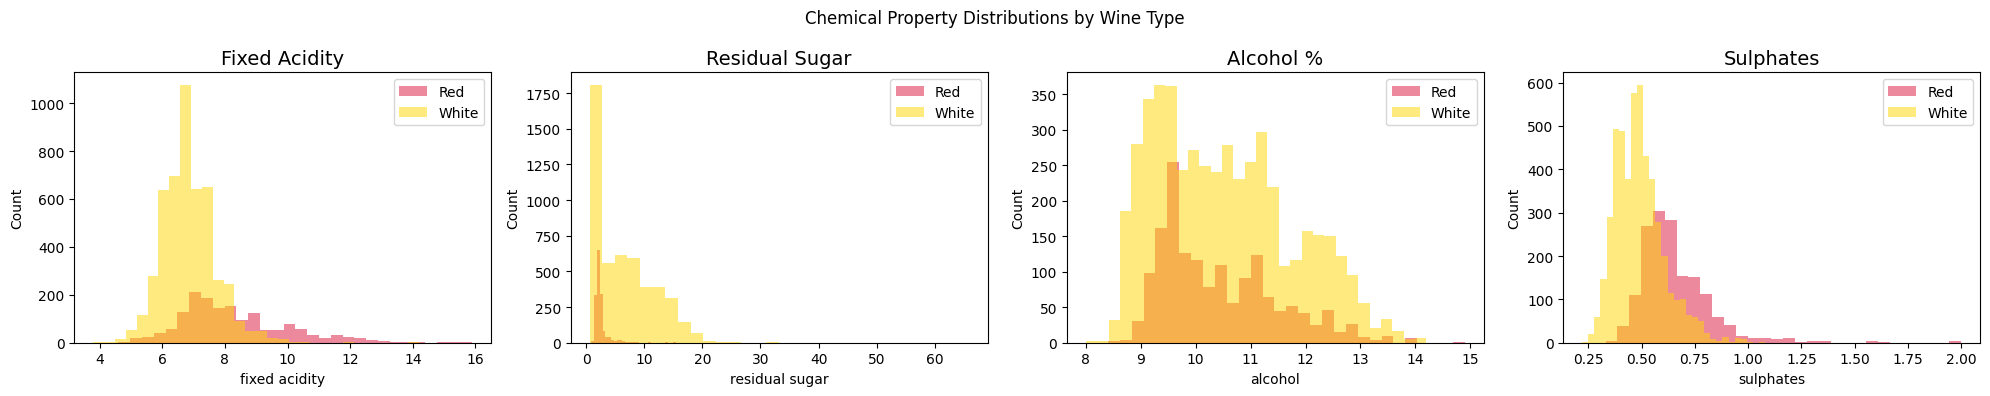

In [43]:
features = ['fixed acidity', 'residual sugar', 'alcohol', 'sulphates']
titles = ['Fixed Acidity', 'Residual Sugar', 'Alcohol %', 'Sulphates']

wine_types = df_wines['type'].unique() # ['red', 'white']

color_map = {
    'red': 'crimson',       # deep red
    'white': 'gold'         # bright yellow
}

plt.figure(figsize=(20, 4))

for i, (feat, title) in enumerate(zip(features, titles), 1):
    plt.subplot(1, 4, i)
    for w in wine_types:
        subset = df_wines[df_wines['type'] == w]
        plt.hist(subset[feat], bins=30, alpha=0.5, label=w.capitalize(), color=color_map[w])

    plt.title(title, fontsize=14)
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.legend()

plt.suptitle("Chemical Property Distributions by Wine Type")
plt.tight_layout()
plt.show()

From this distribution we can see that:

**Fixed Acidity (to measure Acidity Level):**
- White wines are in the higher range, with a sharp peak around 6.5-7.0 g/L
- Red wines have a lower and flatter distribution centered around 7.5-8.5 g/L
- There is a clear sepearation between the two, white wines are more acidic than reds.
- Selecting the bins:
  - Low (<7): Primarily reds, some softer white wines
  - Medium (7-9): Mixed selection, but more whites than reds.
  - High (>9): Almost exclusively white wines.

**Residual Sugar (to measure Sweetness Level):**
- The distribution is extremely right skewed. Most wines are around 0-5 g/L.
- White wines show more variations.
- White wines generally have a higher residual sugar, red wines are all nearly dry.
- Selecting the bins:
  - Dry (<2): Majority of all wine types
  - Off-Dry (2-10): Mostly white wines
  - Sweet (>10): More of the dessert wines

**Alcohol Content (to measure Body Level):**
- Red and white wines have their peak alcohol percentage around 9-10%.
- Higher alcohol percentage suggests a fuller body.
- Selecting the bins:
  - Light (<10%): The more delicate wines
  - Medium (10-11.5%): Pretty mixed
  - Full (>11.5%): Predominantly red wines with a richer body

**Sulphates (to measure Tannin Level):**
- There is a clear separation between the two. Red wines typically have a higher tannin proxy than white wines
- White wines cluster around 0.4-0.5 g/L
- Red wines have a broader distribution from 0.4 - 0.8 in general.
- Selecting the bins
  - Low (<0.5): Almost all white whines
  - Medium (0.5-0.7): Mix of both
  - High (>0.7): Exclusively reds with higher tannins

#### Creating Chemical Categories

Based on these distributions, we can categorize each wine:

In [44]:
# Create chemical categories for pairing analysis
df_wines['acidity_level'] = pd.cut(df_wines['fixed acidity'],
                                     bins=[0, 7, 9, 15],
                                     labels=['Low', 'Medium', 'High'])

df_wines['sweetness_level'] = pd.cut(df_wines['residual sugar'],
                                       bins=[0, 2, 10, 100],
                                       labels=['Dry', 'Off-Dry', 'Sweet'])

df_wines['body_level'] = pd.cut(df_wines['alcohol'],
                                  bins=[0, 10, 11.5, 15],
                                  labels=['Light', 'Medium', 'Full'])

df_wines['tannin_proxy'] = pd.cut(df_wines['sulphates'],
                                    bins=[0, 0.5, 0.7, 2],
                                    labels=['Low', 'Medium', 'High'])
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,acidity_level,sweetness_level,body_level,tannin_proxy
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Medium,Dry,Light,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Medium,Off-Dry,Light,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium,Off-Dry,Light,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,High,Dry,Light,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Medium,Dry,Light,Medium


These categories now match the pairing dataset, allowing us to connect chemical measurements to food pairing recommendations. Each wine in the Chemical Properties dataset now has the precise chemical values and the general categories.

### Integrating Both Datasets

#### Mapping Wines to Food Pairing Recommendations

Since the chemical categories are in both datasets, for each chemical profile, we can aggregate which foods pair well, neutrally, or poorly. Below, we create a rules table.

In [45]:
# Define ordinal encodings for style categories
acidity_map   = {'Low': 0, 'Medium': 1, 'High': 2}
sweet_map     = {'Dry': 0, 'Off-Dry': 1, 'Sweet': 2}
body_map      = {'Light': 0, 'Medium': 1, 'Full': 2}
tannin_map    = {'Low': 0, 'Medium': 1, 'High': 2}

def encode_style(df): # Convert columns into numeric codes to compute distance
    encoded = {'acid_num':   df['acidity_level'].map(acidity_map),
               'sweet_num':  df['sweetness_level'].map(sweet_map),
               'body_num':   df['body_level'].map(body_map),
               'tannin_num': df['tannin_proxy'].map(tannin_map)}
    encoded_df = pd.DataFrame(encoded)
    return encoded_df

style_cols = ['acidity_level', 'sweetness_level', 'body_level', 'tannin_proxy']

# Aggregate df_pairing into style-level food lists per pairing_label
agg = (df_pairing
       .groupby(style_cols + ['quality_label'])['food_category']
       .apply(lambda s: sorted(set(s.dropna())))  # set to ensure no duplicates
       .reset_index())

# Pivot table so that each col has good, neutral, bad
pivot = agg.pivot_table(index=style_cols,
                        columns='quality_label',
                        values='food_category',
                        aggfunc=lambda x: x).reset_index()

# Making sure that all exist
for col in ['good', 'neutral', 'bad']:
    if col not in pivot.columns:
        pivot[col] = None

# Clean rules table
pivot = pivot[['acidity_level', 'sweetness_level', 'body_level', 'tannin_proxy',
               'good', 'neutral', 'bad']]

rules = pivot.copy()
rules.head()

quality_label,acidity_level,sweetness_level,body_level,tannin_proxy,good,neutral,bad
0,High,Dry,Medium,Medium,[Dessert],[Dessert],[Dessert]
1,High,Off-Dry,Medium,Medium,"[Acidic, Seafood]","[Acidic, Seafood]",NaN
2,Low,Off-Dry,Medium,Medium,NaN,[Acidic],[Acidic]
3,Medium,Dry,Medium,Medium,NaN,[Dessert],[Dessert]
4,Medium,Off-Dry,Full,Medium,"[Creamy, Pork]","[Creamy, Pork, Poultry]",[Poultry]


This creates a rules table where each row represents a unique chemical profile and the columns list the foods that pair well, neutrally, or poorly with that specific profile.

#### Matching Wines to Rules via Nearest Neighbor

Since not every combination appears in the pairing data, we use the euclidean distance to find the most similar style profile.

In [46]:
# Numerical encodings for rules and wines
rules_style_num = encode_style(rules)
wines_style_num = encode_style(df_wines)

# Convert to numpy to calculate distance
rules_X = rules_style_num.to_numpy()
wines_X = wines_style_num.to_numpy()

# Find index of closest style rule by euclidean distance
nearest_idx = []
for i in range(len(df_wines)):
    diff = rules_X - wines_X[i]
    dist = (diff ** 2).sum(axis=1)
    nearest_idx.append(dist.argmin())

nearest_idx = np.array(nearest_idx)

This approach helps us get data even if we don't have an exact match. We use the closest profile.

#### Assigning Pairing Recommendations

Now we can assign each wine its pairing recommendations based on the matched rule:

In [47]:
# Convert rule columns to numpy arrays
good_arr = rules['good'].to_numpy()
neutral_arr = rules['neutral'].to_numpy()
bad_arr = rules['bad'].to_numpy()

# Use nearest_idx to pick the rule for each wine
good_vals = [g if isinstance(g, list) else []
             for g in good_arr[nearest_idx]]

neutral_vals = [g if isinstance(g, list) else []
                for g in neutral_arr[nearest_idx]]

bad_vals = [g if isinstance(g, list) else []
            for g in bad_arr[nearest_idx]]

# Assign these cols to df_wines
df_wines['good_foods_to_pair_with'] = good_vals
df_wines['neutral_foods_to_pair_with'] = neutral_vals
df_wines['bad_foods_to_pair_with'] = bad_vals

df_wines[['good_foods_to_pair_with',
          'neutral_foods_to_pair_with',
          'bad_foods_to_pair_with']].head()

,good_foods_to_pair_with,neutral_foods_to_pair_with,bad_foods_to_pair_with
0,[],[Dessert],[Dessert]
1,"[Pork, Poultry, Seafood]","[Creamy, Pork, Poultry, Seafood]","[Creamy, Pork]"
2,"[Pork, Poultry, Seafood]","[Creamy, Pork, Poultry, Seafood]","[Creamy, Pork]"
3,[Dessert],[Dessert],[Dessert]
4,[],[Dessert],[Dessert]


Each wine now has three lists of food categories representing pairing quality.

#### Removing Duplicates

Now we need to clean this to ensure each food category appears in only one columns.

In [48]:
def clean_lists(row):
    g = set(row['good_foods_to_pair_with'] or [])
    n = set(row['neutral_foods_to_pair_with'] or []) - g
    b = set(row['bad_foods_to_pair_with'] or []) - g - n

    return pd.Series([list(g), list(n), list(b)],
                     index=['good_foods_to_pair_with', 'neutral_foods_to_pair_with', 'bad_foods_to_pair_with'])

df_wines[['good_foods_to_pair_with',
          'neutral_foods_to_pair_with',
          'bad_foods_to_pair_with']] = df_wines.apply(clean_lists, axis=1)

df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,acidity_level,sweetness_level,body_level,tannin_proxy,good_foods_to_pair_with,neutral_foods_to_pair_with,bad_foods_to_pair_with
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Medium,Dry,Light,Medium,[],[Dessert],[]
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Medium,Off-Dry,Light,Medium,"[Seafood, Poultry, Pork]",[Creamy],[]
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium,Off-Dry,Light,Medium,"[Seafood, Poultry, Pork]",[Creamy],[]
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,High,Dry,Light,Medium,[Dessert],[],[]
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Medium,Dry,Light,Medium,[],[Dessert],[]


Now each wine in the dataset has a personalized food pairing recommendation based on its chemical profile.

## Exploratory Data Analysis

Our goal is to understand how the chemical properties differ between wines, how the quality is affected by these properties, how the food categories the wine pairs with is influenced, and the pairing versatility across different wine qualities.

### Chemical Properties by Wine Type

We begin by examining how the four key chemical categories used in pairing analysis (acidity, sweetness, body, and tannins) differ between red and white wines. These differences reflect the sensory structure of wines and influence traditional pairing rules.

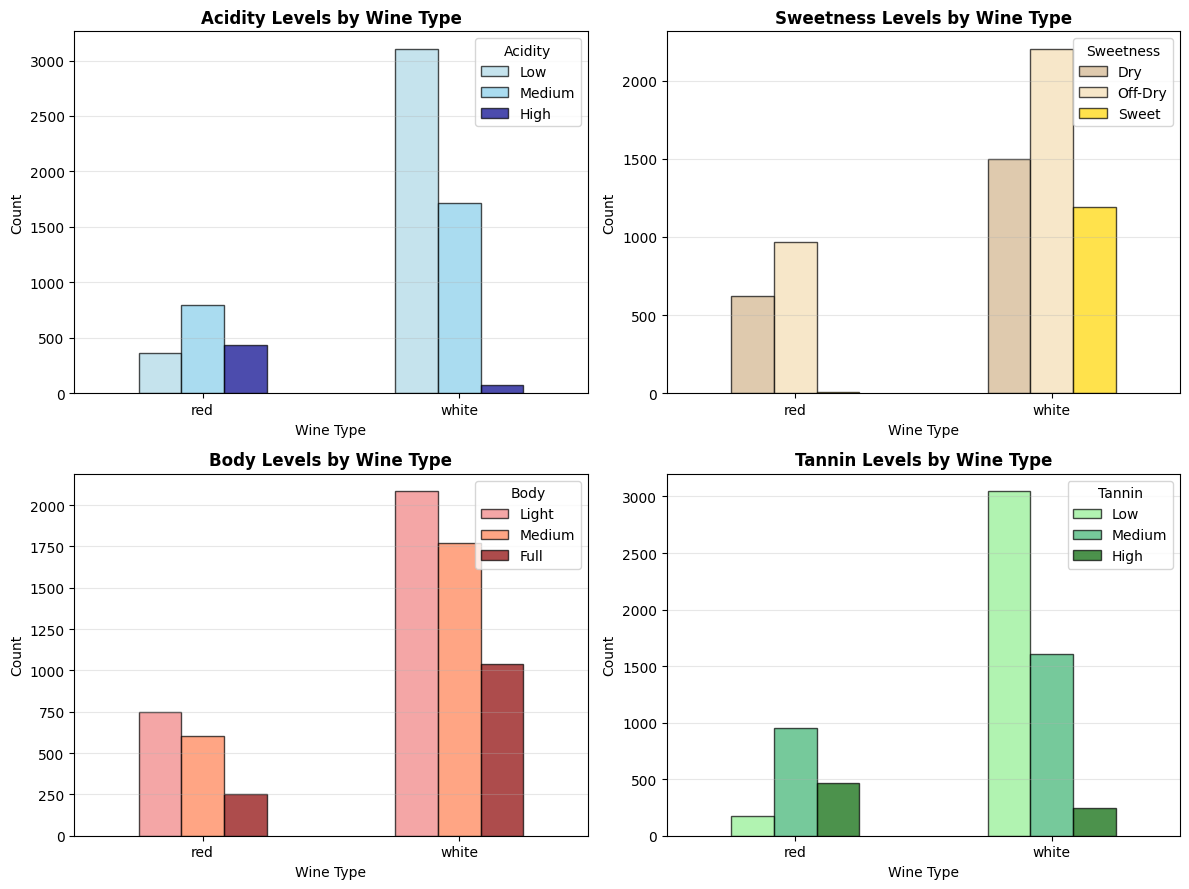

In [49]:
# Chemical categories visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Acidity levels by wine type
pd.crosstab(df_wines['type'], df_wines['acidity_level']).plot(
    kind='bar', ax=axes[0, 0],
    color=['lightblue', 'skyblue', 'darkblue'],
    alpha=0.7, edgecolor='black'
)
axes[0, 0].set_title('Acidity Levels by Wine Type', fontweight='bold')
axes[0, 0].set_xlabel('Wine Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].legend(title='Acidity', loc='upper right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Sweetness levels by wine type
pd.crosstab(df_wines['type'], df_wines['sweetness_level']).plot(
    kind='bar', ax=axes[0, 1],
    color=['tan', 'wheat', 'gold'],
    alpha=0.7, edgecolor='black'
)
axes[0, 1].set_title('Sweetness Levels by Wine Type', fontweight='bold')
axes[0, 1].set_xlabel('Wine Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].legend(title='Sweetness', loc='upper right')
axes[0, 1].grid(axis='y', alpha=0.3)

# Body levels by wine type
pd.crosstab(df_wines['type'], df_wines['body_level']).plot(
    kind='bar', ax=axes[1, 0],
    color=['lightcoral', 'coral', 'darkred'],
    alpha=0.7, edgecolor='black'
)
axes[1, 0].set_title('Body Levels by Wine Type', fontweight='bold')
axes[1, 0].set_xlabel('Wine Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].legend(title='Body', loc='upper right')
axes[1, 0].grid(axis='y', alpha=0.3)

# Tannin levels by wine type
pd.crosstab(df_wines['type'], df_wines['tannin_proxy']).plot(
    kind='bar', ax=axes[1, 1],
    color=['lightgreen', 'mediumseagreen', 'darkgreen'],
    alpha=0.7, edgecolor='black'
)
axes[1, 1].set_title('Tannin Levels by Wine Type', fontweight='bold')
axes[1, 1].set_xlabel('Wine Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].legend(title='Tannin', loc='upper right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Summary**

- White wines exhibit higher counts in high acidity and lighter body levels

- Red wines exhibit much higher tannin levels and fuller body

- Sweetness is distributed differently across wine types, with whites more commonly Off-Dry or Sweet

**Interpretation**

These chemical differences align with established pairing logic:

- Red wines’ higher tannins and fuller bodies make them ideal for red meat and hearty dishes

- White wines’ higher acidity and lighter texture make them better suited for seafood, poultry, and creamy foods

### Chemical Properties by Wine Quality

Wine quality is a high-level indicator of balance, complexity, and structure. Here, we visualize how chemical variables shift across quality scores (3–9) to see whether higher-quality wines exhibit distinct chemical signatures.

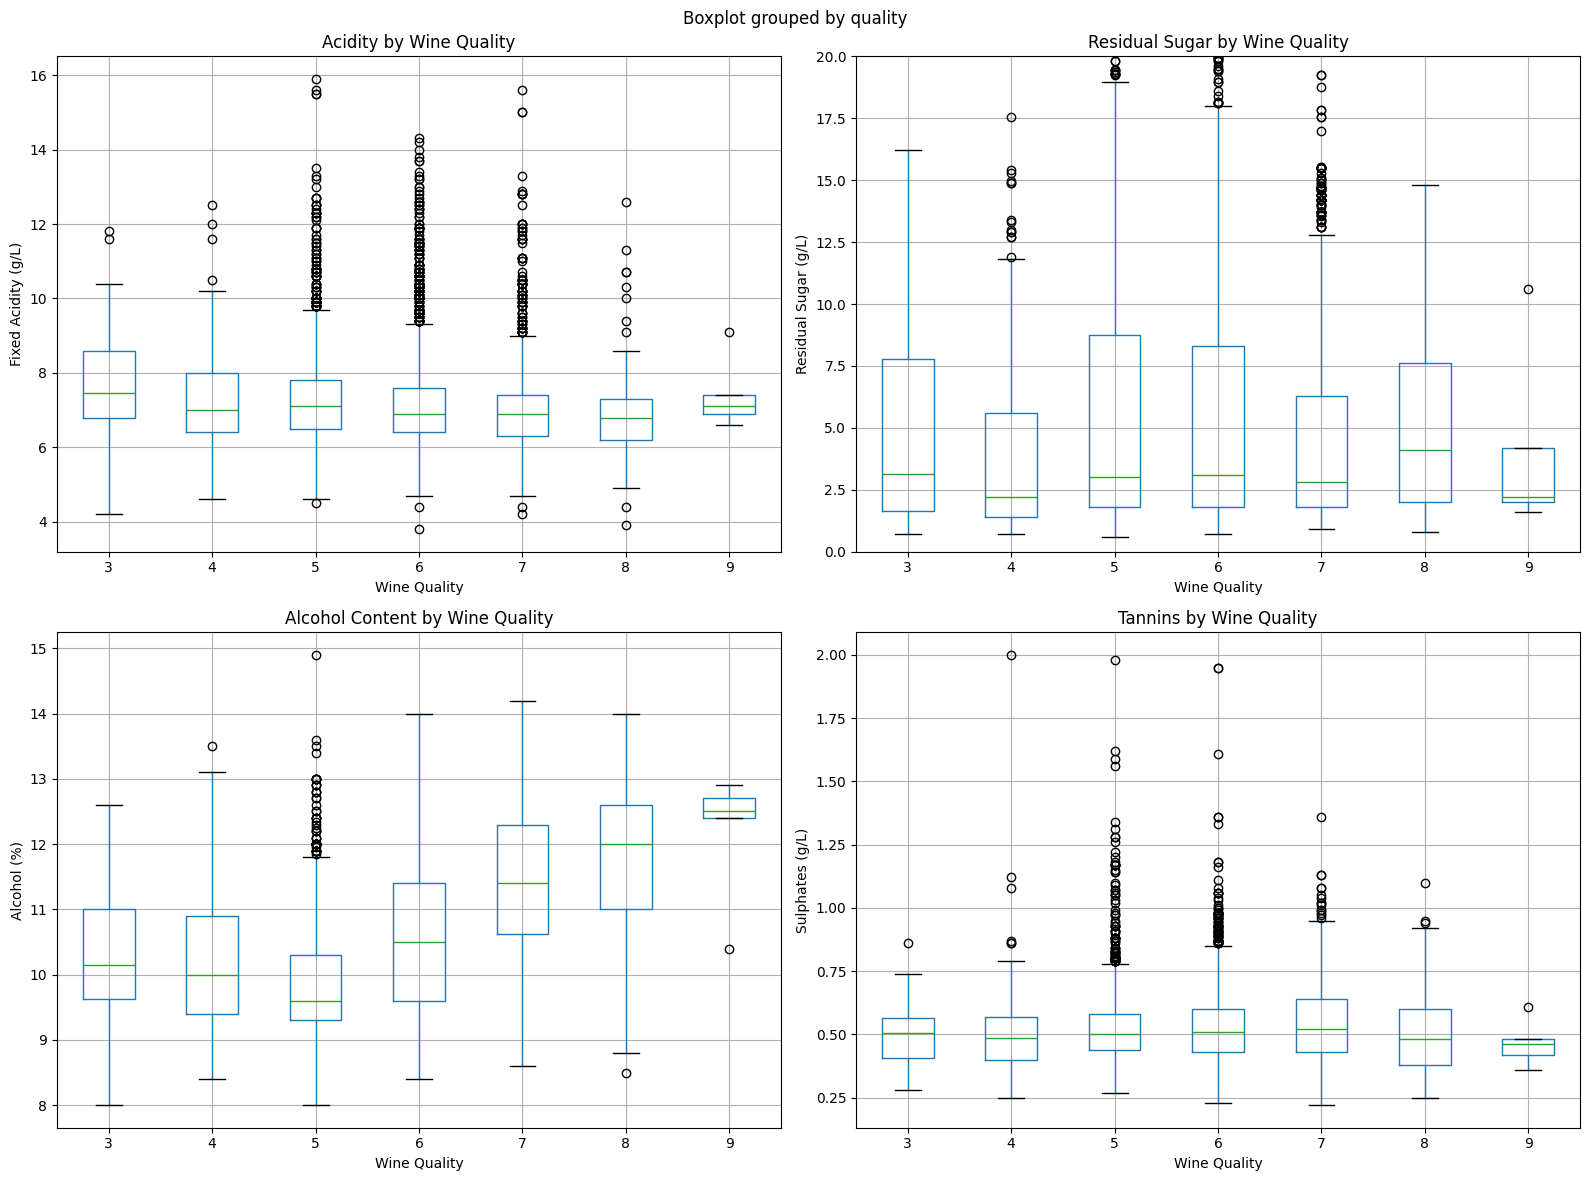

In [50]:
# Chemical properties vs Quality visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Acidity vs Quality
df_wines.boxplot(column='fixed acidity', by='quality', ax=axes[0, 0])
axes[0, 0].set_title('Acidity by Wine Quality')
axes[0, 0].set_xlabel('Wine Quality')
axes[0, 0].set_ylabel('Fixed Acidity (g/L)')
plt.sca(axes[0, 0])

# Residual Sugar vs Quality
df_wines.boxplot(column='residual sugar', by='quality', ax=axes[0, 1])
axes[0, 1].set_title('Residual Sugar by Wine Quality')
axes[0, 1].set_xlabel('Wine Quality')
axes[0, 1].set_ylabel('Residual Sugar (g/L)')
axes[0, 1].set_ylim(0, 20)  # Focus on main distribution
plt.sca(axes[0, 1])

# Alcohol vs Quality
df_wines.boxplot(column='alcohol', by='quality', ax=axes[1, 0])
axes[1, 0].set_title('Alcohol Content by Wine Quality')
axes[1, 0].set_xlabel('Wine Quality')
axes[1, 0].set_ylabel('Alcohol (%)')
plt.sca(axes[1, 0])

# Tannins vs Quality
df_wines.boxplot(column='sulphates', by='quality', ax=axes[1, 1])
axes[1, 1].set_title('Tannins by Wine Quality')
axes[1, 1].set_xlabel('Wine Quality')
axes[1, 1].set_ylabel('Sulphates (g/L)')
plt.sca(axes[1, 1])

plt.tight_layout()
plt.show()

**Summary**

- Alcohol content rises slightly with quality.

- Acidity, residual sugar, and tannin show wide internal variation

- There is substantial overlap between quality levels

**Interpretation**

- Quality influences chemistry but not strongly enough to cleanly separate wines

- This suggests that quality alone cannot explain food pairing behavior: a more detailed view of chemistry is required

### Wine Type vs Good Food Pairings

This heatmap visualizes how red and white wines distribute their GOOD food pairings across different food categories, providing a clear view of the pairing tendencies of each wine category and helps reveal whether certain foods are consistently better matches for reds, whites, or both.

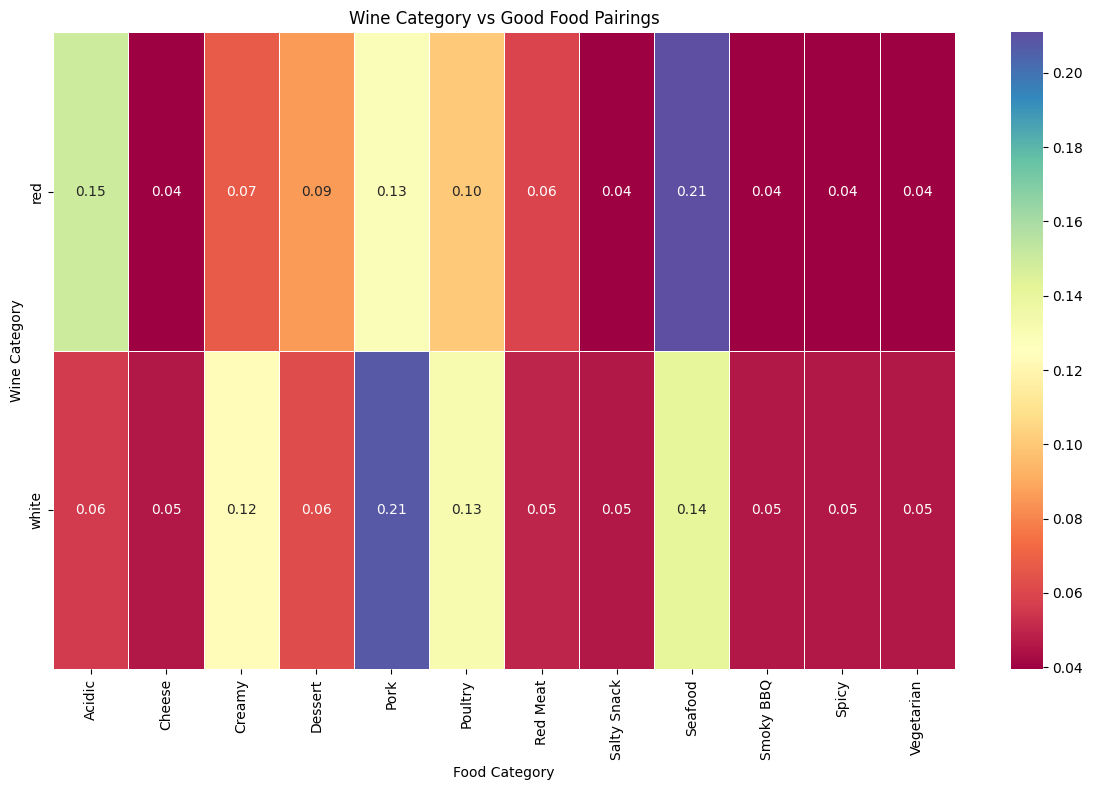

In [51]:
# Explode good pairings: one row per (wine, food)
df_good = (
    df_wines[["type", "good_foods_to_pair_with"]]
    .explode("good_foods_to_pair_with")
    .dropna(subset=["good_foods_to_pair_with"])
    .rename(columns={
        "type": "wine_category",
        "good_foods_to_pair_with": "food_category"
    })
)

# Crosstab counts: wine_category x food_category
cross = pd.crosstab(df_good["wine_category"], df_good["food_category"])

# Normalize rows => convert to proportions
cross_norm = cross.div(cross.sum(axis=1), axis=0)

# Heatmap (Normalized)
plt.figure(figsize=(12, 8))
sns.heatmap(
    cross_norm,
    cmap="Spectral",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor="white"
)

plt.xlabel("Food Category")
plt.ylabel("Wine Category")
plt.title("Wine Category vs Good Food Pairings")
plt.tight_layout()
plt.show()

**Summary**

- Both red and white wines pair most often with Pork and Seafood

- White wines show stronger associations with Creamy and Poultry dishes

- Red wines show higher proportions for Acidic dishes

- Very low proportions appear for Spicy, Smoky BBQ, Salty Snack, Vegetarian for both wine types

**Interpretation**

- Wine category meaningfully shapes good pairing patterns, but not in strictly traditional ways (e.g., red wines pairing well with seafood)

- The overlap across categories suggests that wine type alone cannot predict perfect pairings

- This reinforces the need to consider wine chemistry (acidity, sweetness, body, tannins) to understand and model pairing behavior more accurately

### Chemical Properties vs Good Food Pairings

To understand how specific wine characteristics influence pairing success, we examine how four key chemical properties (acidity, sweetness, body, and tannin level) relate to the distribution of good food pairings in the dataset. Each heatmap visualizes how often wines with a given chemical trait successfully pair with each food category.

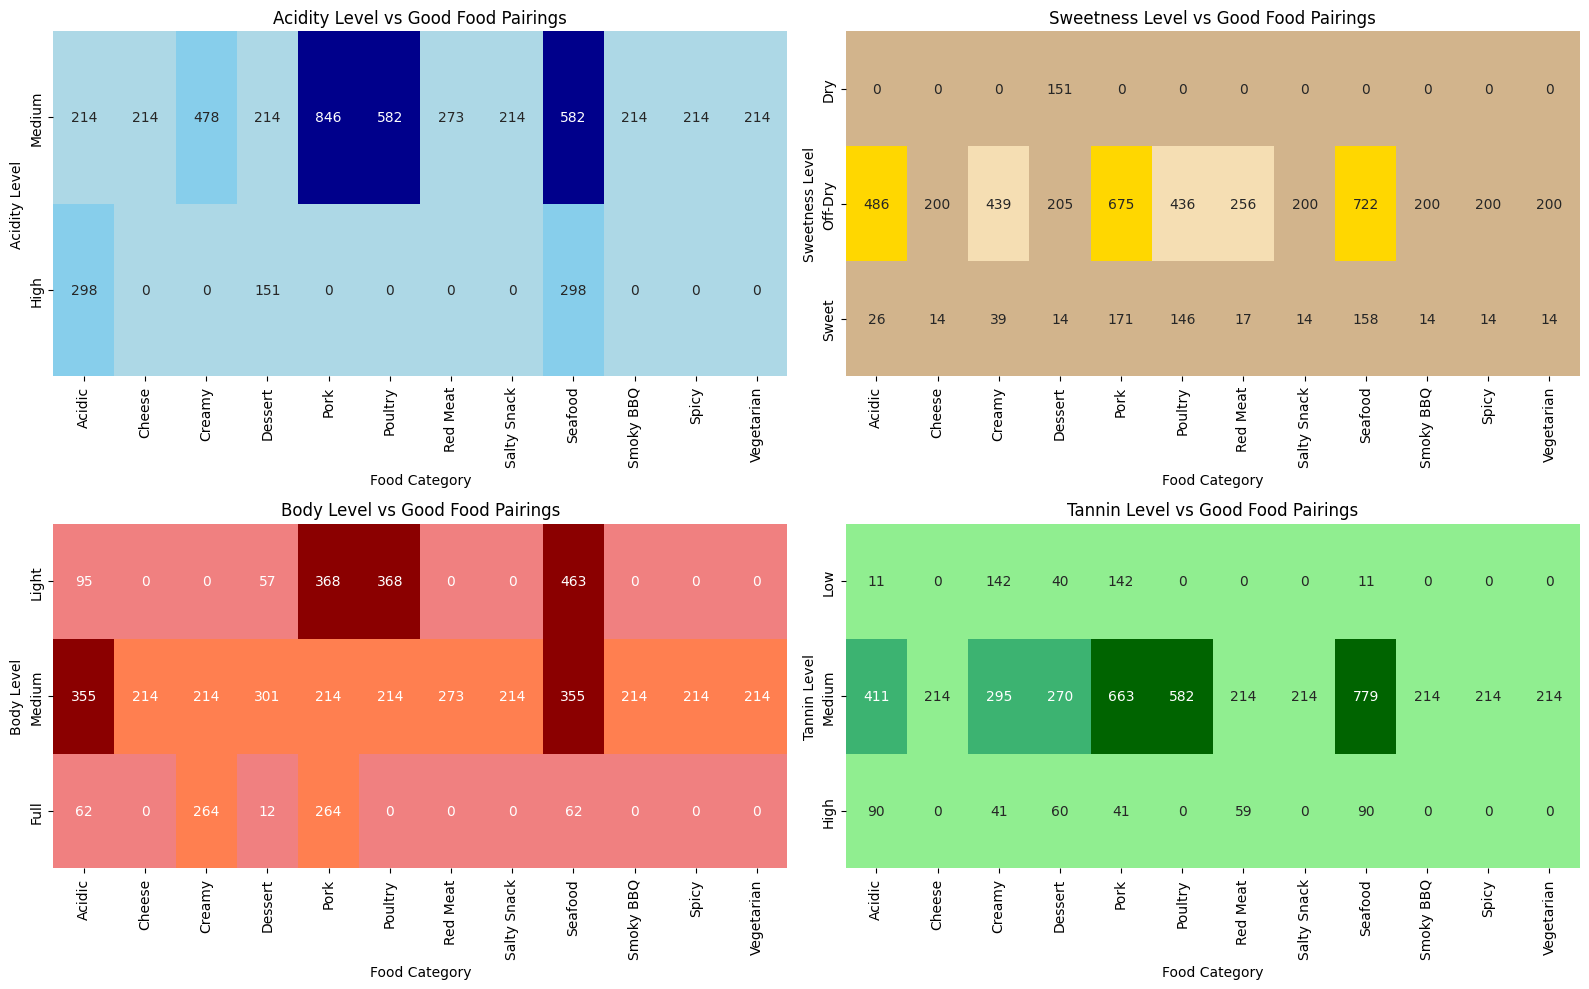

In [52]:
# Explode good foods so every food pairing is a row
df_good = (
    df_wines[["acidity_level","sweetness_level","body_level","tannin_proxy","good_foods_to_pair_with"]]
    .explode("good_foods_to_pair_with")
    .dropna(subset=["good_foods_to_pair_with"])
    .rename(columns={"good_foods_to_pair_with": "food_category"})
)

# Chemical properties and matching color palettes
chem_props = {
    "acidity_level": {
        "title": "Acidity Level",
        "colors": ["lightblue", "skyblue", "darkblue"]
    },
    "sweetness_level": {
        "title": "Sweetness Level",
        "colors": ["tan", "wheat", "gold"]
    },
    "body_level": {
        "title": "Body Level",
        "colors": ["lightcoral", "coral", "darkred"]
    },
    "tannin_proxy": {
        "title": "Tannin Level",
        "colors": ["lightgreen", "mediumseagreen", "darkgreen"]
    }
}

# Subplot figure in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for ax, (col, cfg) in zip(axes.flat, chem_props.items()):

    # Build crosstab
    ct = pd.crosstab(df_good[col], df_good["food_category"])

    # Heatmap
    sns.heatmap(
        ct,
        cmap=sns.color_palette(cfg["colors"], as_cmap=True),
        annot=True,
        fmt="d",
        cbar=False,
        ax=ax
    )

    # Titles + Labels
    ax.set_title(f"{cfg['title']} vs Good Food Pairings")
    ax.set_xlabel("Food Category")
    ax.set_ylabel(cfg["title"])

plt.tight_layout()
plt.show()

**Summary**

- Acidity: Medium-acidity wines produce the most good pairings (especially with Pork and Seafood) while high acidity is more selective (Acidic dishes, Seafood)

- Sweetness: Off-Dry wines dominate good pairings across all food types, whereas Dry and Sweet wines appear far less frequently

- Body: Medium-bodied wines show the strongest and broadest pairing success, with Light body favoring Seafood and Full body aligning with Creamy and Pork dishes

- Tannin: Medium tannin levels generate the most good pairings while high and low tannin wines contribute minimally

- Across all four traits, Pork and Seafood repeatedly stand out as the most common good-pairing foods while categories like Spicy, Smoky BBQ, Salty Snack, and Vegetarian remain consistently low

**Interpretation**

- Acidity: Balanced acidity enhances versatility while high or low acidity narrows pairing effectiveness

- Sweetness: A slight amount of sweetness significantly increases compatibility, making Off-Dry wines the most flexible across foods.

- Body: Moderate body matches a wide range of dish intensities, demonstrating the importance of weight-matching in food–wine pairing.

- Tannin: Moderate tannins are the most food-friendly; extreme tannin levels restrict which foods pair well.

- Overall, these patterns show that balanced chemical properties, not wine category alone, shape pairing success, reinforcing the need to incorporate acidity, sweetness, body, and tannin into the predictive model

### Frequency of Food Categories

Before pairing modeling, we must understand how frequently each food category appears. Class imbalance can strongly influence model performance.

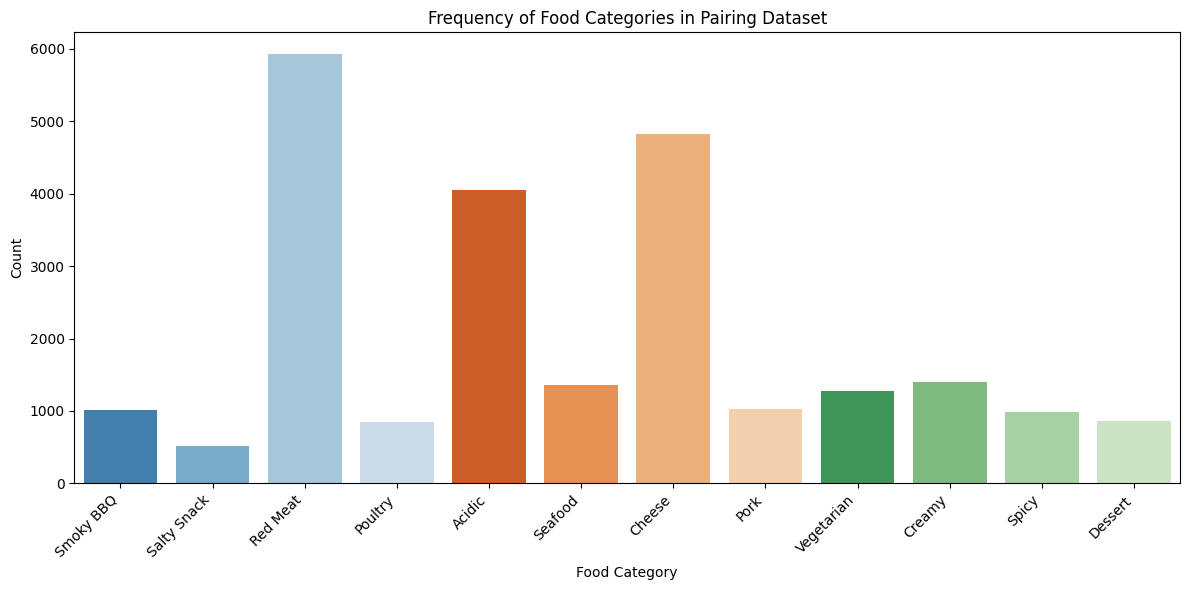

In [53]:
# Countplot for Food Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df_pairing, x="food_category", hue="food_category", palette="tab20c")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Food Category")
plt.ylabel("Count")
plt.title("Frequency of Food Categories in Pairing Dataset")
plt.tight_layout()
plt.show()

**Summary**

- Red Meat, Cheese, and Acidic dishes are the most frequent food categories in the dataset

- Categories like Vegetarian, Creamy, Poultry, and Seafood appear moderately often

- Smoky BBQ, Salty Snack, Spicy, and Dessert show relatively low frequencies compared to the others

**Interpretation**

- The dataset is imbalanced, with certain food categories (especially Red Meat and Cheese) appearing far more often than others

- This imbalance may influence model training, making some food types easier to predict and others harder

- The uneven distribution also reflects real-world pairing biases: common foods like red meat and cheese naturally appear more frequently in pairing records while categories like dessert or spicy foods are less frequently paired with wine

## Hypothesis

The four chemical traits, acidity, sweetness, body, and tannin, can be used to reliably classify the best matching food category for a given wine.

### Why This Hypothesis Is Important

- Choosing the right food pairing has a considerable impact on consumer experience, restaurant recommendations, and retail wine sales

- A model that predicts food pairing based solely on chemistry would allow pairing suggestions even when wine type, region, or tasting notes are unavailable

- Understanding which chemical traits drive pairing success provides insight into why certain wines pair well, not just that they do

### Why This Hypothesis Is Reasonable (Based on our EDA)

Our EDA strongly supports this hypothesis:

- **Specific chemical traits show predictable food associations**: the Chemical Properties vs Good Food Pairings heatmaps reveal clear relationships:

  - Higher Acidity => Acidic dishes & Seafood

  - Higher Sweetness => Pork, Creamy, and Spicy dishes

  - Full Body => Creamy and heavy dishes

  - Higher Tannin => Richer, protein-heavy foods

  - These patterns reflect real-world pairing logic, reinforcing that chemistry determines food compatibility

- **Wine category alone is insufficient**: the Wine Category vs Good Food Pairings heatmap shows:

  - Red and white wines share many overlapping pairing categories

  - Some unexpected associations appear (e.g., red wines with seafood)

  - This indicates that wine “type” is too broad, and more granular chemical traits must be used to predict pairings

- **Food frequencies and versatility patterns support a learnable structure**:

  - Pork and Seafood consistently appear as major good pairing foods across all chemical levels

  - Extreme categories (Smoky BBQ, Spicy, Dessert) remain consistently low

  - This means the dataset has stable patterns a model can learn from

## Conclusion & Future Work

### Conclusion

Overall, the project justified our central hypothesis: chemical properties plays the most meaningful role in determining which foods pair best with a wine.

Through extensive EDA and model evaluation, we were able to establish the significant links between acidity, sweetness, body, tannin levels, and the successfully paired food categories.

Our KNN classification model demonstrated that wine chemistry does contain predictive structure. While the performance was modest, reflecting the complexity and imbalance of the dataset, it confirmed that chemical features do influence pairing outcomes and can be used to classify food categories.

### Strengths

- **Strong EDA Foundation**: The project thoroughly explored the datasets before modeling, uncovering wine-type differences, chemical-property distributions, food category imbalances, and chemically driven pairing patterns. This provided a clear, evidence-based justification for the modeling approach.

- **Clear and Interpretable Features**: The discretized chemistry features acidity level, sweetness level, body level, and tannin proxy, aligned naturally with real-world pairing rules, making the model interpretable and intuitive.

- **Consistency between EDA and Model Insights**: Patterns seen in the heatmaps (e.g., medium traits being most versatile, off-dry sweetness pairing broadly) were reflected in model predictions, reinforcing the dataset’s internal structure.

- **Practical and Scalable Prediction Goal**: Predicting food pairings from chemistry alone mimics real recommendation systems and sommelier logic—making the work relevant beyond the academic setting.

### Limitations

- **Dataset Imbalance**: Some food categories (e.g., Red Meat, Cheese, Acidic dishes) were heavily overrepresented while others (Dessert, Smoky BBQ, Spicy) had very few samples, which reduces model fairness, causes the KNN to overpredict common classes, and limits evaluation of rare pairing categories.

- **Limited Feature Richness**: The model used categorical chemical levels, not the raw numeric chemistry. This removed nuance, such as differences between moderate vs slightly-high acidity, sugar–acid balance, or alcohol effects.

- **KNN Model Constraints**: KNN struggles when classes overlap (as they do here) and many categories exist. More advanced models would likely handle this structure better.

- **Incomplete Pairing Labels Due to Limited Data**: We originally attempted to generate good, neutral, and bad food pairings from the dataset, which resulted in highly unstable labels. Many wine–style combinations contained no reliable negative examples, and the cleaning process (which prioritized good over neutral and bad) removed most remaining “bad” entries entirely. This limits the model’s ability to learn full-spectrum pairing behavior.

### Future Work

- **Expand and Balance the Pairing Dataset**: Obtaining a larger, real-world dataset with more evenly represented food categories would address the strong class imbalance and allow the model to learn more robust pairing patterns across all cuisines.

- **Incorporate Raw Numerical Chemistry and Feature Engineering**: Using continuous chemical measurements, such as exact pH, residual sugar, acidity ratios, alcohol levels, and sulphates, would capture nuance lost in categorical labels and provide models with richer information about wine structure.

- **Adopt More Advanced Modeling Techniques**: Tree-based models (Random Forest, XGBoost) or neural networks could better handle overlapping classes and nonlinear relationships, offering significant performance improvements over KNN.

- **Develop Stable Multi-Label Pairing Predictions**: Future work should include reliable data on neutral and bad pairings, enabling models to recommend multiple food categories per wine and capture the full spectrum of pairing outcomes rather than only “good” matches.

### Relevent Resources

Puckette, M. (n.d.). *Food and Wine Pairing Basics (Start Here!)*. Wine Folly. Retrieved December 8, 2025, from https://winefolly.com/wine-pairing/getting-started-with-food-and-wine-pairing/

- **How Wine Folly Supports Our Findings**: Wine Folly identifies acidity, sweetness, bitterness (tannins), and intensity (body) as the core drivers of food–wine interactions. This directly reinforces our conclusion that chemical composition, not wine type alone, determines pairing success.

- **Alignment With Project Strengths**: Wine Folly’s framework validates our chemistry-based approach. Our discretized features (acidity, sweetness, body, and tannin level) parallel the exact taste dimensions the article highlights. The consistency between our heatmaps and Wine Folly’s pairing rules strengthens the credibility and interpretability of our EDA and KNN model.

- **Reinforcing Our Limitations**: The article stresses nuance in acidity, sweetness, and intensity that we lose with categorical labels. Wine Folly also discusses clashing interactions, illuminating why sparse negative labels limited our model. Finally, the article’s diverse pairing examples highlight how imbalanced food categories can distort predictive modeling.

- **Implications for Future Work**: Wine Folly’s principles support our recommendations: use raw chemical values, incorporate richer pairing data (including negative matches), and adopt more expressive models to capture nonlinear taste interactions. This would better reflect the multidimensional pairing logic described in Wine Folly.